# **Mileage Prediction - Regression Analysis**

## **Objective**

Develop a robust regression model to accurately predict the miles per gallon (mpg) of vehicles based on various features, including cylinders, displacement, horsepower, weight, acceleration, model year, and origin.

## **Data Source**

This dataset was taken from StatLib library which is maintained at Camegie Mellon University.The dataset was used in the 1983 American Statistical Association Exposition.

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **Import Data**

In [ ]:
data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MPG.csv')

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Data Preprocessing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.describe() # Provides a summary of statistical measures for each column in a DataFrame, excluding NaN values.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# **Removing Missing Values**

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **Data Visualization**

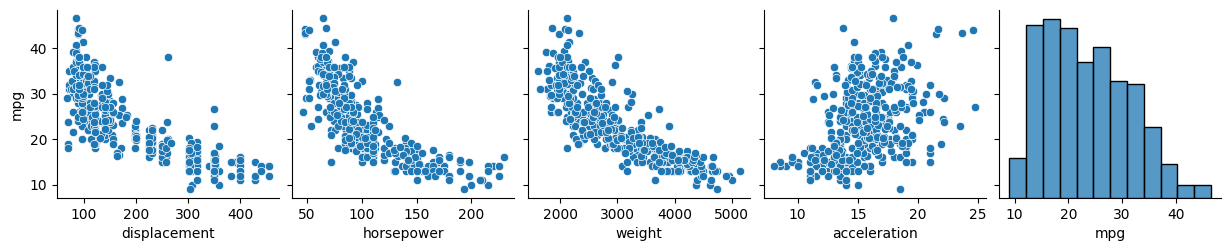

In [ ]:
sns.pairplot(data = data , x_vars=['displacement','horsepower','weight','acceleration', 'mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

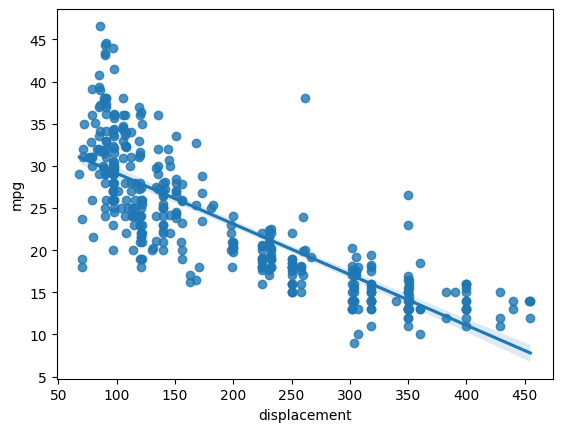

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = data)

# **Define Target Variable y and Feature X**

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = data['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
X = data[['displacement' , 'horsepower' , 'weight' , 'acceleration']]

In [ ]:
X.shape

(392, 4)

In [ ]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# **Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X = ss.fit_transform(X)

In [ ]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 252)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((274, 4), (118, 4), (274,), (118,))

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
model.intercept_

23.523484213517357

In [ ]:
model.coef_

array([-0.33814682, -1.82851351, -4.48834219, -0.07538261])

# **Predict Test Data**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([19.00730991, 15.79954477, 31.02134151, 27.45618806, 31.06778956,
       27.70610884, 15.00827486, 24.56958364, 14.39915229, 21.69805142,
       21.96040164, 25.63572755, 22.61425449, 31.69079843, 29.83756986,
       26.09352515, 17.26667678, 22.94439816, 30.56002141, 27.08005943,
       24.49097899, 27.26475289, 24.74655802, 29.0917992 , 27.44185705,
       18.11148313, 29.32973165, 21.10917344, 30.72122666, 24.62703987,
       26.71937666, 30.6704679 , 25.91873795, 25.95547975, 30.5467605 ,
       21.89192138, 19.52498222, 24.38332435, 21.09269963, 23.46546461,
       30.74423641, 21.2436572 , 15.2947388 , 12.11656271, 24.7283977 ,
       13.79622411, 24.22180544, 27.51654084, 29.30044681, 29.62227212,
       15.651219  , 23.91111801, 16.02485001,  9.76420987, 16.5252374 ,
       27.37266203, 16.31461545, 11.23098481, 26.19076084, 27.76343954,
       29.56908254, 31.04862907, 13.21010296, 16.46630079, 30.3874824 ,
       32.43243421, 14.5400427 , 10.60385716, 11.75240676, 21.89

# **Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score

In [ ]:
mean_absolute_percentage_error(y_test , y_pred)

0.14094873446479836

In [ ]:
mean_absolute_error(y_test , y_pred)

3.1598320736541528

In [ ]:
r2_score(y_test , y_pred)

0.724461503203927

# **Explanation**

In this project, we successfully developed a regression model to predict the miles per gallon (mpg) of vehicles using various features such as cylinders, displacement, horsepower, weight, acceleration, model year, and origin.

## **We have performed following tasks.**

### 1.Library Imports and Data Import
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MPG.csv')

```
## 2.Data Exploration


```
data.head()
```

## 3.Data Preprocessing

*   Handling Missing Values
```
data = data.dropna()
```
*   Data Standarization
```
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
```

## 4.Data Visualization


```
sns.pairplot(data = data , x_vars=['displacement','horsepower','weight','acceleration', 'mpg'],y_vars=['mpg'])
sns.regplot(x = 'displacement', y = 'mpg', data = data)
```

## 5.Model Development

```
model = LinearRegression()
```

## 6.Model Training and Evaluation

*   Train-Test Split: Splitting the data into training and testing sets.
*   Model Training: Training the regression model on the training data.
*  Model Evaluation: Evaluating the model performance using metrics such as Mean Squared Error (MSE), R-squared, etc.



```
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 252)
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test , y_pred)
mean_absolute_error(y_test , y_pred)
r2_score(y_test , y_pred)

```




















